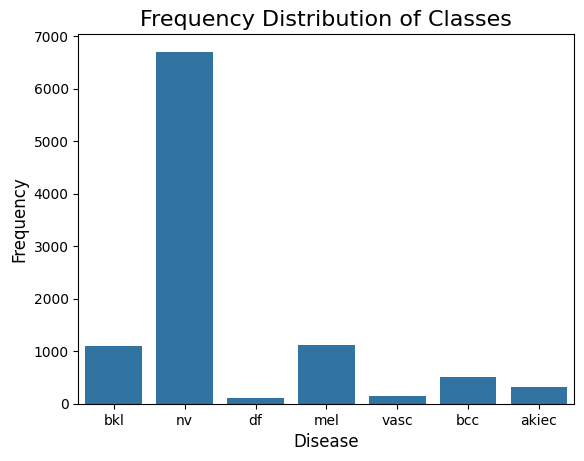

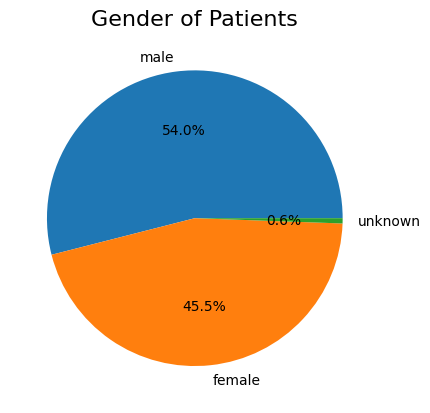

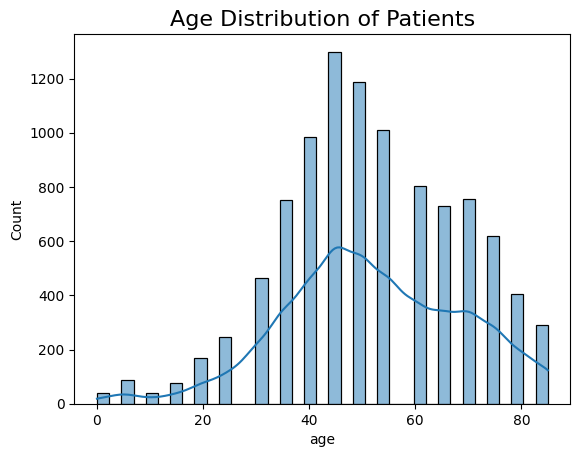

Found 8012 validated image filenames belonging to 7 classes.
Found 2003 validated image filenames belonging to 7 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,214,442 (16.08 MB)

 Trainable params: 164,871 (644.03 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.1535 - loss: 1.9179 
Epoch 1: val_accuracy improved from -inf to 0.11133, saving model to /content/drive/MyDrive/best_model_lazy.keras
251/251 ━━━━━━━━━━━━━━━━━━━━ 2160s 8s/step - accuracy: 0.1535 - loss: 1.9181 - val_accuracy: 0.1113 - val_loss: 1.9408
Epoch 2/15
250/251 ━━━━━━━━━━━━━━━━━━━━ 0s 800ms/step - accuracy: 0.1310 - loss: 1.9340
Epoch 2: val_accuracy did not improve from 0.11133
251/251 ━━━━━━━━━━━━━━━━━━━━ 263s 895ms/step - accuracy: 0.1309 - loss: 1.9341 - val_accuracy: 0.1098 - val_loss: 1.9493
Epoch 3/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 764ms/step - accuracy: 0.1135 - loss: 1.9367
Epoch 3: val_accuracy did not improve from 0.11133
251/251 ━━━━━━━━━━━━━━━━━━━━ 254s 857ms/step - accuracy: 0.1135 - loss: 1.9368 - val_accuracy: 0.1113 - val_loss: 1.9433
Epoch 4/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 762ms/step - accuracy: 0.1156 - loss: 1.9577
Epoch 4: val_accuracy did not improve from 0.11133
251/251 ━━━━━━━━━━━━━━━━━━━━ 278s

KeyboardInterrupt: 

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Load the Tabular Data
tabular_data = pd.read_csv('/content/drive/MyDrive/skin/HAM10000_metadata.csv')

# EDA: Frequency Distribution of Classes
sns.countplot(x='dx', data=tabular_data)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)
plt.show()

# EDA: Gender Distribution
plt.pie(tabular_data['sex'].value_counts(), labels=tabular_data['sex'].value_counts().index, autopct="%.1f%%")
plt.title('Gender of Patients', size=16)
plt.show()

# EDA: Histogram of Age
sns.histplot(tabular_data['age'], kde=True)
plt.title('Age Distribution of Patients', size=16)
plt.show()

# Define Directories
image_dir_part_1 = '/content/drive/MyDrive/skin/HAM10000_images_part_1/'
image_dir_part_2 = '/content/drive/MyDrive/skin/HAM10000_images_part_2/'

def get_image_path(image_id):
    part_1_path = os.path.join(image_dir_part_1, image_id + '.jpg')
    part_2_path = os.path.join(image_dir_part_2, image_id + '.jpg')
    if os.path.exists(part_1_path):
        return part_1_path
    elif os.path.exists(part_2_path):
        return part_2_path
    else:
        raise FileNotFoundError(f"Image {image_id} not found in any directory.")

# Add `path` and `label`
image_labels = tabular_data[['image_id', 'dx']].copy()
image_labels['path'] = image_labels['image_id'].apply(get_image_path)

# Label Mapping
label_mapping = {label: idx for idx, label in enumerate(image_labels['dx'].unique())}
image_labels['label'] = image_labels['dx'].map(label_mapping)
image_labels['label'] = image_labels['label'].astype(str)  # Convert labels to strings

# Train-Test Split
train_df, test_df = train_test_split(image_labels, test_size=0.2, stratify=image_labels['label'], random_state=1)

# ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

validation_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

# Compute Class Weights
class_weights = compute_class_weight('balanced', classes=np.unique(train_df['label']), y=train_df['label'])
class_weights_dict = dict(enumerate(class_weights))

# Transfer Learning with EfficientNetB0
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(label_mapping), activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Callbacks
checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/best_model_lazy.keras', monitor='val_accuracy', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True, verbose=1)

# Train the Model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15,
    class_weight=class_weights_dict,
    callbacks=[checkpoint, early_stopping]
)

# Plot Accuracy and Loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the Model
loss, accuracy = model.evaluate(validation_generator, verbose=2)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Save the Model
model.save('/content/drive/MyDrive/skin/skin_cancer_detection_lazy_model_2.h5')


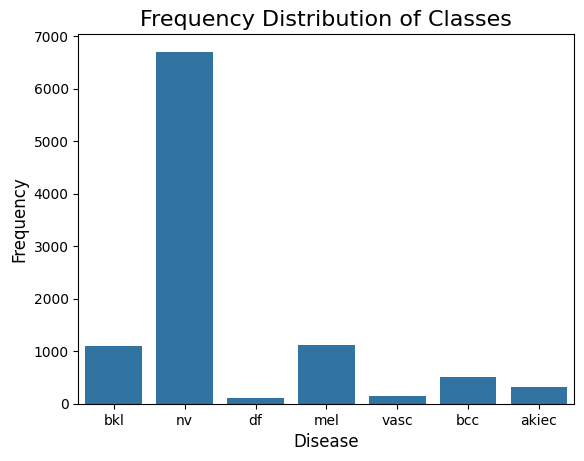

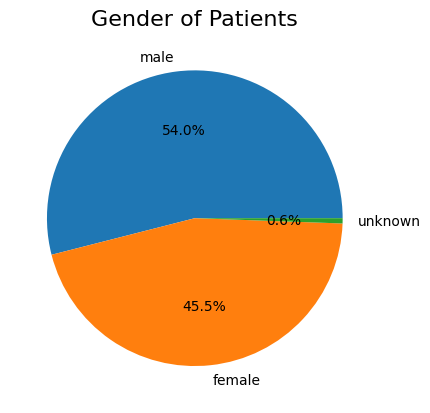

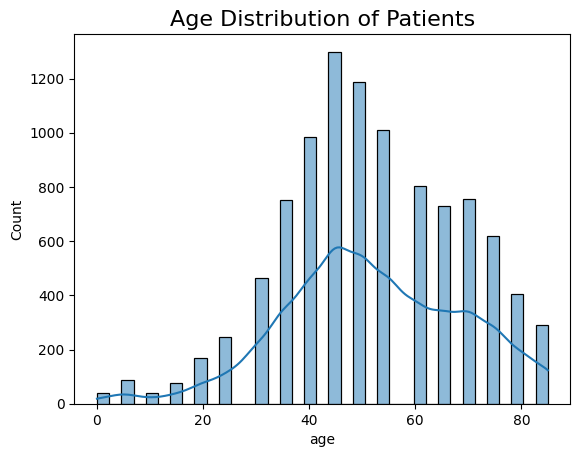

Found 8012 validated image filenames belonging to 7 classes.
Found 2003 validated image filenames belonging to 7 classes.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,411,306 (16.83 MB)

 Trainable params: 4,369,283 (16.67 MB)

 Non-trainable params: 42,023 (164.16 KB)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 995ms/step - accuracy: 0.3095 - loss: 1.8900
Epoch 1: val_accuracy improved from -inf to 0.01148, saving model to best_model_lazy.keras
251/251 ━━━━━━━━━━━━━━━━━━━━ 384s 1s/step - accuracy: 0.3099 - loss: 1.8894 - val_accuracy: 0.0115 - val_loss: 1.9956 - learning_rate: 1.0000e-04
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 804ms/step - accuracy: 0.5737 - loss: 1.2143
Epoch 2: val_accuracy improved from 0.01148 to 0.01598, saving model to best_model_lazy.keras
251/251 ━━━━━━━━━━━━━━━━━━━━ 269s 906ms/step - accuracy: 0.5738 - loss: 1.2140 - val_accuracy: 0.0160 - val_loss: 2.0789 - learning_rate: 1.0000e-04
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 802ms/step - accuracy: 0.6143 - loss: 0.8961
Epoch 3: val_accuracy improved from 0.01598 to 0.61558, saving model to best_model_lazy.keras
251/251 ━━━━━━━━━━━━━━━━━━━━ 233s 908ms/step - accuracy: 0.6144 - loss: 0.8960 - val_accuracy: 0.6156 - val_loss: 1.1527 - learning_rate: 1.0000e-04
Epoch 4/20
251/251 ━━━━━

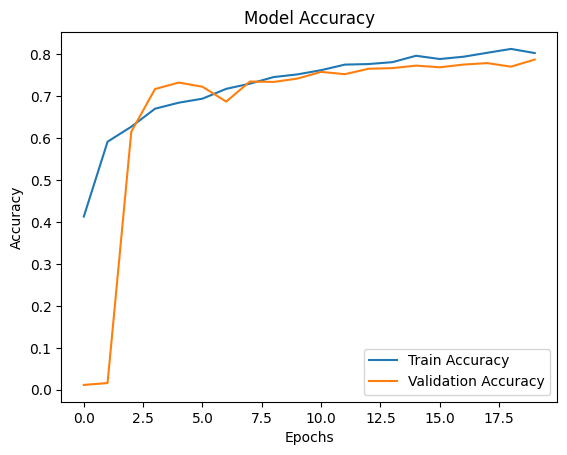

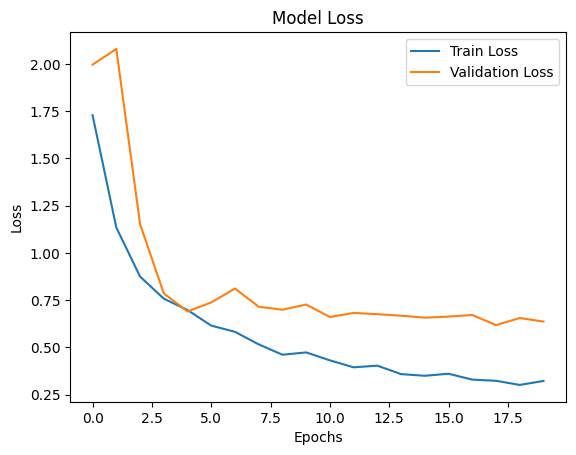

63/63 - 25s - 398ms/step - accuracy: 0.7878 - loss: 0.6367


Test Loss: 0.6366916298866272, Test Accuracy: 0.7878182530403137


In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Load the Tabular Data
tabular_data = pd.read_csv('/content/drive/MyDrive/skin/HAM10000_metadata.csv')

# EDA: Frequency Distribution of Classes
sns.countplot(x='dx', data=tabular_data)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)
plt.show()

# EDA: Gender Distribution
plt.pie(tabular_data['sex'].value_counts(), labels=tabular_data['sex'].value_counts().index, autopct="%.1f%%")
plt.title('Gender of Patients', size=16)
plt.show()

# EDA: Histogram of Age
sns.histplot(tabular_data['age'], kde=True)
plt.title('Age Distribution of Patients', size=16)
plt.show()

# Define Directories
image_dir_part_1 = '/content/drive/MyDrive/skin/HAM10000_images_part_1/'
image_dir_part_2 = '/content/drive/MyDrive/skin/HAM10000_images_part_2/'

def get_image_path(image_id):
    part_1_path = os.path.join(image_dir_part_1, image_id + '.jpg')
    part_2_path = os.path.join(image_dir_part_2, image_id + '.jpg')
    if os.path.exists(part_1_path):
        return part_1_path
    elif os.path.exists(part_2_path):
        return part_2_path
    else:
        raise FileNotFoundError(f"Image {image_id} not found in any directory.")

# Add `path` and `label`
image_labels = tabular_data[['image_id', 'dx']].copy()
image_labels['path'] = image_labels['image_id'].apply(get_image_path)

# Label Mapping
label_mapping = {label: idx for idx, label in enumerate(image_labels['dx'].unique())}
image_labels['label'] = image_labels['dx'].map(label_mapping)
image_labels['label'] = image_labels['label'].astype(str)  # Convert labels to strings

# Train-Test Split
train_df, test_df = train_test_split(image_labels, test_size=0.2, stratify=image_labels['label'], random_state=1)

# ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

validation_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

# Compute Class Weights
class_weights = compute_class_weight('balanced', classes=np.unique(train_df['label']), y=train_df['label'])
class_weights_dict = dict(enumerate(class_weights))

# Transfer Learning with EfficientNetB0
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = True  # Enable fine-tuning

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(label_mapping), activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Callbacks
checkpoint = ModelCheckpoint(filepath='best_model_lazy.keras', monitor='val_accuracy', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True, verbose=1)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Train the Model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    class_weight=class_weights_dict,
    callbacks=[checkpoint, early_stopping, lr_reduction]
)

# Plot Accuracy and Loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the Model
loss, accuracy = model.evaluate(validation_generator, verbose=2)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Save the Model
model.save('/content/drive/MyDrive/skin/skin_cancer_detection_lazy_model.h5')
